<a href="https://colab.research.google.com/github/blabossiere/cap-comp215/blob/main/Comp_215_Project_1_Thursday_February_22%2C_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Science 215 Project 1
#Brayden Labossiere
#Monday February 26, 2024

Initial setup of the screen:
Ideas from https://www.askpython.com/python/examples/draw-without-turtle# and
https://colab.research.google.com/drive/1xtiBrGeRHmXY3KSOixkZBf_rJIgBImJu?usp=sharing


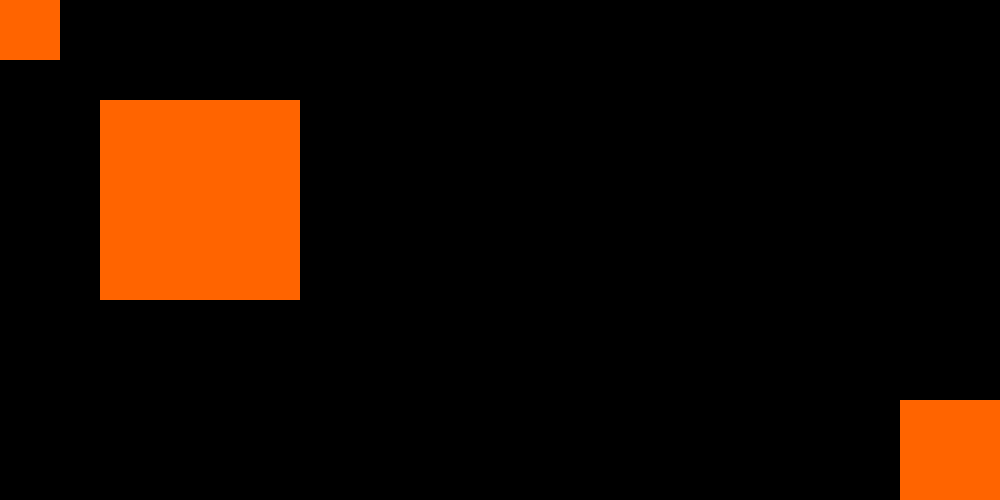

In [ ]:
import pygame
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys
import math

pygame.init()

pygame.init()
screen = pygame.display.set_mode((1000, 500))
done = False
is_blue = True
x = 0
y = 0

# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

color = (255, 100, 0)
pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))
pygame.draw.rect(screen, color, pygame.Rect(100, 100, 200, 200))
pygame.draw.rect(screen, color, pygame.Rect(900, 400, 1000, 500))

pygame.display.flip()

#convert image so it can be displayed in OpenCV
view = pygame.surfarray.array3d(screen)

#  convert from (width, height, channel) to (height, width, channel)
view = view.transpose([1, 0, 2])

#  convert from rgb to bgr
img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

#Display image, clear cell every 0.5 seconds
cv2_imshow(img_bgr)
time.sleep(0.5)

In [ ]:
class Circle:
  """Takes the input of radius, and the x-coordinate, and y-coordinate of the circle's centre, and describes its movement"""

  def __init__(self, centre:tuple, radius):
    """Takes the input of radius, as well as the x-coordinate and the y-coordiante of the centre, and initializes the variables."""
    assert len(centre) == 2
    x_centre = centre[0]
    y_centre = centre[1]
    self.radius = radius
    self.x_centre = x_centre
    self.y_centre = y_centre

  def getX(self):
    """Return the x value of a circle's centre."""
    return self.x_centre

  def getY(self):
    """Returns the y-value of a circle's centre."""
    return self.y_centre

  def circle_area(self):
    """Takes the input of a circle, and returns its' radius."""
    return math.pi * (self.radius ** 2)

  def move_circle(self, dx, dy):
    """Takes the input of a circle, the x-distance moved right, and the y-distance moved up, and moves the circles' centre to a new coordinate."""
    new_x = self.x_centre + dx
    new_y = self.y_centre + dy
    self.x_centre = new_x
    self.y_centre = new_y
    return new_x, new_y

  def move_paddle(self, dy):
    """Takes the input of a circle, and its changed y coordinate."""
    new_y = self.y_centre + dy
    return (self.x_centre + dy)

  def distance(self, other:'circle'):
    """Takes the input of two circles.  Returns the distance between the two circle's centres."""
    x1 = self.x_centre
    y1 = self.y_centre
    x2 = other.x_centre
    y2 = other.y_centre
    return ((((x2 - x1) ** 2) + ((y2 - y1) ** 2)) ** 0.5)

  def touching(self, other:'circle'):
    """Takes the input of two circles.  If the circles are touching, return 'True'.  Else, return 'False'."""
    return self.radius + other.radius > self.distance(other)

  def at_y_boundary(self):
    """Takes the input of a circle and evaluates if the circle is at one of the y-boundaries of the screen."""
    if self.y_centre > 500 or self.y_centre < 0:
      return True
    else:
      return False

  def at_x_boundary(self):
    """Takes the input of a circle and evaluates if the circle is at one of the x-boundaries of the screen."""
    if self.x_centre > 1000 or self.x_centre < 0:
      return True
    else:
      return False

# Unit Tests

c = Circle((5, 5), 3)
d = Circle((8, 9), 4)
e = Circle((6, 6), 4)
f = c
g = Circle((6, 6), 3)
h = Circle((100, 100), 2)

c.circle_area()
c.move_circle(1, 1)
print(c.getX(), c.getY())
c.distance(d)

assert c.touching(d) == True
assert c.touching(e) == True
assert c.touching(f) == True
assert c.touching(g) == True
assert c.touching(h) == False

i = Circle((5, -1), 4)
j = Circle((5, 505), 4)

assert c.at_y_boundary() == False
assert i.at_y_boundary() == True
assert j.at_y_boundary() == True

k = Circle((-1, 5), 4)
l = Circle((1001, 5), 4)

assert c.at_x_boundary() == False
assert k.at_x_boundary() == True
assert l.at_x_boundary() == True

print("All Tests Passed!")

6 6
All Tests Passed!


Screen Workings

 ball coordinates: 810 , 370


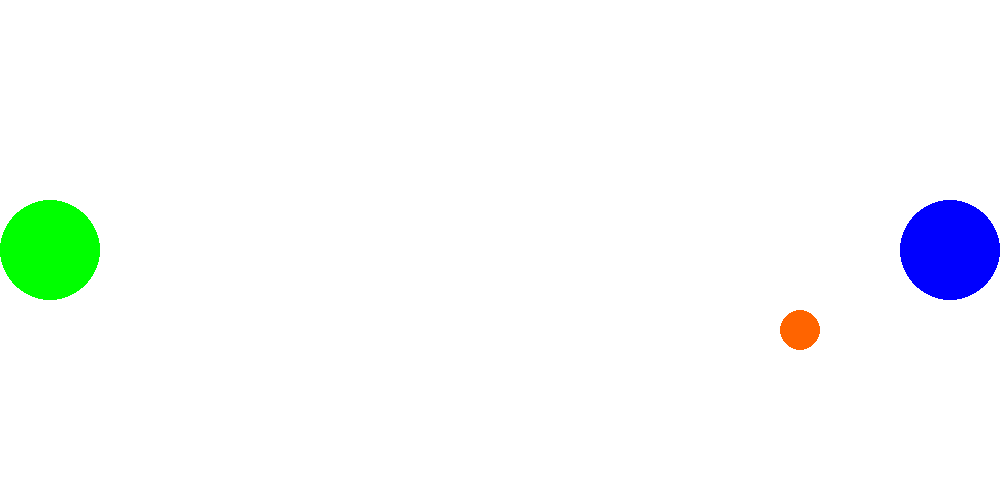

KeyboardInterrupt: 

In [ ]:
pygame.init()
screen = pygame.display.set_mode((1000, 500))
done = False
is_blue = True
x = 0
y = 0

total_events = range(10) # events
ball_dy = 40
ball_dx = 10
white = [255, 255, 255]

os.environ["SDL_VIDEODRIVER"] = "dummy"

color = (255, 100, 0)

"""Ball Instance."""
ball = Circle((500, 250), 20)

ball_x = ball.getX()
ball_y = ball.getY()
ball_radius = ball.radius



"""Left Paddle Instance."""
left_paddle = Circle((50, 250), 50)

left_paddle_x = left_paddle.getX()
left_paddle_y = left_paddle.getY()
left_paddle_radius = left_paddle.radius

pygame.draw.circle(screen, 'green', (left_paddle_x, left_paddle_y), left_paddle_radius)

"""Right Paddle Instance"""
right_paddle = Circle((950, 250), 50)

right_paddle_x = right_paddle.getX()
right_paddle_y = right_paddle.getY()
right_paddle_radius = right_paddle.radius

pygame.draw.circle(screen, 'blue', (right_paddle_x, right_paddle_y), right_paddle_radius)

def ball_move_and_erase():
  """A function that describes three movements that appear frequently in the game.  The ball is moved, the new ball is drawn, and then the old ball is erased."""
  ball.move_circle(ball_dx, ball_dy)
  pygame.draw.circle(screen, color, (ball_x, ball_y), ball_radius) # Draw Circle
  pygame.draw.circle(screen, white, (ball_x, ball_y), ball_radius) # Draw White Circle to erase previous circle.

print(ball.getX())
print(ball.getY())
print(ball.radius)

ball_x = (ball.getX())
ball_y = (ball.getY())
ball_radius = ball.radius

# Running the program.

while ball.at_x_boundary() == False:
  for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        done = True

   # clear display
  screen.fill([255, 255, 255])

  ball_x = (ball.getX())
  ball_y = (ball.getY())
  ball_radius = ball.radius

  pygame.draw.circle(screen, color, (ball_x, ball_y), ball_radius) # Draw Ball
  pygame.draw.circle(screen, 'green', (left_paddle_x, left_paddle_y), left_paddle_radius) # Redraw left (green) paddle to draw over the white eraser.
  pygame.draw.circle(screen, 'blue', (right_paddle_x, right_paddle_y), right_paddle_radius) # Redraw right (blue) paddle to draw over the white eraser.

  #convert image so it can be displayed in OpenCV
  view = pygame.surfarray.array3d(screen)

  #  convert from (width, height, channel) to (height, width, channel)
  view = view.transpose([1, 0, 2])

  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)
  time.sleep(0.3)
  output.clear()

  print(' ball coordinates:', ball.getX(), ',', ball.getY())
  if ball.at_y_boundary() == True:
    ball_dy = -ball_dy
    ball_move_and_erase()
  if ball.touching(left_paddle):
    ball_dx = -ball_dx
    ball_dy = -ball_dy
    ball_move_and_erase()
    pygame.draw.circle(screen, 'green', (left_paddle_x, left_paddle_y), left_paddle_radius) # Redraw left (green) paddle to draw over the white eraser.
  if ball.touching(right_paddle):
    ball_dx = -ball_dx
    ball_dy = -ball_dy
    ball_move_and_erase()
    pygame.draw.circle(screen, 'blue', (right_paddle_x, right_paddle_y), right_paddle_radius) # Redraw right (blue) paddle to draw over the white eraser.

  ball.move_circle(ball_dx, ball_dy)
  pygame.draw.circle(screen, color, (ball_x, ball_y), ball_radius) # Draw Circle
  pygame.draw.circle(screen, white, (ball_x, ball_y), ball_radius) # Draw White Circle to erase previous circle.

  # update display
  pygame.display.update()
  pygame.display.flip()
